### Loading Libraries

In [25]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import SimpSOM as sps
%config InlineBackend.figure_format = 'retina'


### Reading in the data.

In [14]:
#Before Training
M = pd.read_csv('mal.dat')
B = pd.read_csv('benign.dat')
A = pd.read_csv('adv_mal.dat')
#After Training For 50 Epochs
M_50 = np.load('malicious_50.npy')
B_50 = np.load('benign_50.npy')
A_50 = np.load('adversarial_50.npy')
M_50 = M_50[:1000]
B_50 = B_50[:1000]
A_50 = A_50[:1000]

### Helper Functions

In [23]:
"""
bar_plot =>   
Function to plot the feature counts for the different data samples i.e Malicious, Benign & Adversarial.
 Inputs:
    1) Column-The column names for the data we are plotting.
    2) f1_counts/f2_counts- The counts for the the columns we are plotting for a particular data-type.
    4) labels-This is a list of names corresponding to the data that we are plotting used in the legend of the plot.
"""
def bar_plot(column,f1_count,f2_count,labels):
    columns = column
    f1_counts = f1_count
    f2_counts = f2_count

    x = np.arange(len(columns))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(13,5))
    rects1 = ax.bar(x - width/2, f1_counts, width, label=labels[0])
    rects2 = ax.bar(x + width/2, f2_counts, width, label=labels[1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Column/Feature Counts')
    ax.set_title('Columns/Features with highest count differences.')
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = int(rect.get_height())
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(4.25,3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

def Visualise_SOM(data):    
    train=np.array(data)
    net = sps.somNet(20, 20, train, PBC=True)
    net.train(0.01, 20)
    #net.save("weights")
    net.diff_graph()
    
#Counting number of 1s for each column for the data samples(i.e Malign, Benign, Adversarial) before and after training.
MC=M.sum(axis=0).values
BC=B.sum(axis=0).values
AC=A.sum(axis=0).values
MC_50=M_50.sum(axis=0)
BC_50=B_50.sum(axis=0)
AC_50=A_50.sum(axis=0)    

# 1) Familiarisation & Visualisation Task

## Basic Idea
We present a frequency based analysis to visualise the detection task and familiarize ourselves with the structure of the different PEs (i.e. Malicious and Benign), eventually juxtaposing it with adversarial samples that are generated. The plots show total number of occurrences of 1 values for different features (i.e. the API calls that were made) in the binary feature vectors of the PEs. These are Sorted according to maximum difference so as to highlight the differences in structuring of Malicious/benign PEs.

## Before Training:

### Malicious vs Benign
We start by looking at the difference between the feature space of Malicious and Benign PEs. It is fair to observe that the nature of a malicious PE is obtained by keeping some common features as 1 (let's call these as malicious API calls) which correspond to the features (or API calls) with high counts in the structure of a malicious PE. Example: API call at 53 or 203 which seems to be present in > 75% of the malicious PEs.

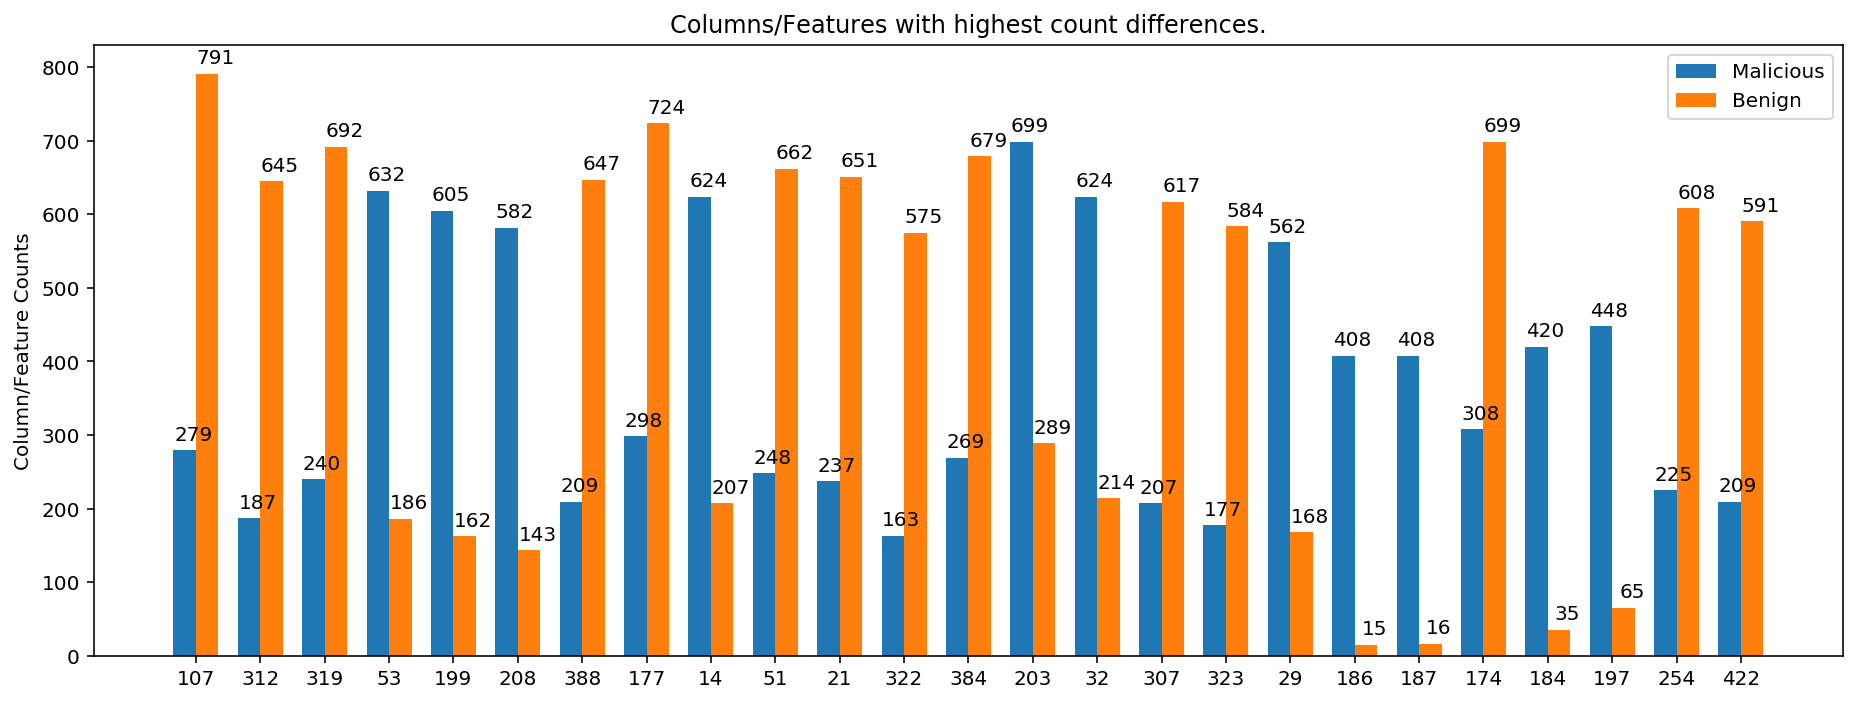

In [26]:
# We highlight the difference between adversarial and malicious samples by using the PEs with maximum difference 
diffM_B=abs(MC - BC)

# Sort the indices based on most difference (Top 25).
indicesM_B=diffM_B.argsort()[::-1][:25]
MCn = MC[indicesM_B]
BCn = BC[indicesM_B]

#Plotting the counts.
bar_plot(indicesM_B,MCn,BCn,["Malicious", "Benign"]) 

### Malicious vs Adversarial
By looking at the same set of calls for the adversarial samples (superimposed against the Malicious PEs), it can be observed that the adversaries that get generated, try to match the structure of the malicious samples. This is apparent when looking at the features with high counts in Malicious and observing that the adversarial samples tend to have a similar count for those features! We again draw attention to counts at 53 and 203 (and the rest as well!) where the adversarial counts and malicious counts end up having the same heights. Additionally this pattern with the adversarial samples seems to follow if more than 50% (roughly) malicious samples had that particular feature set to 1.

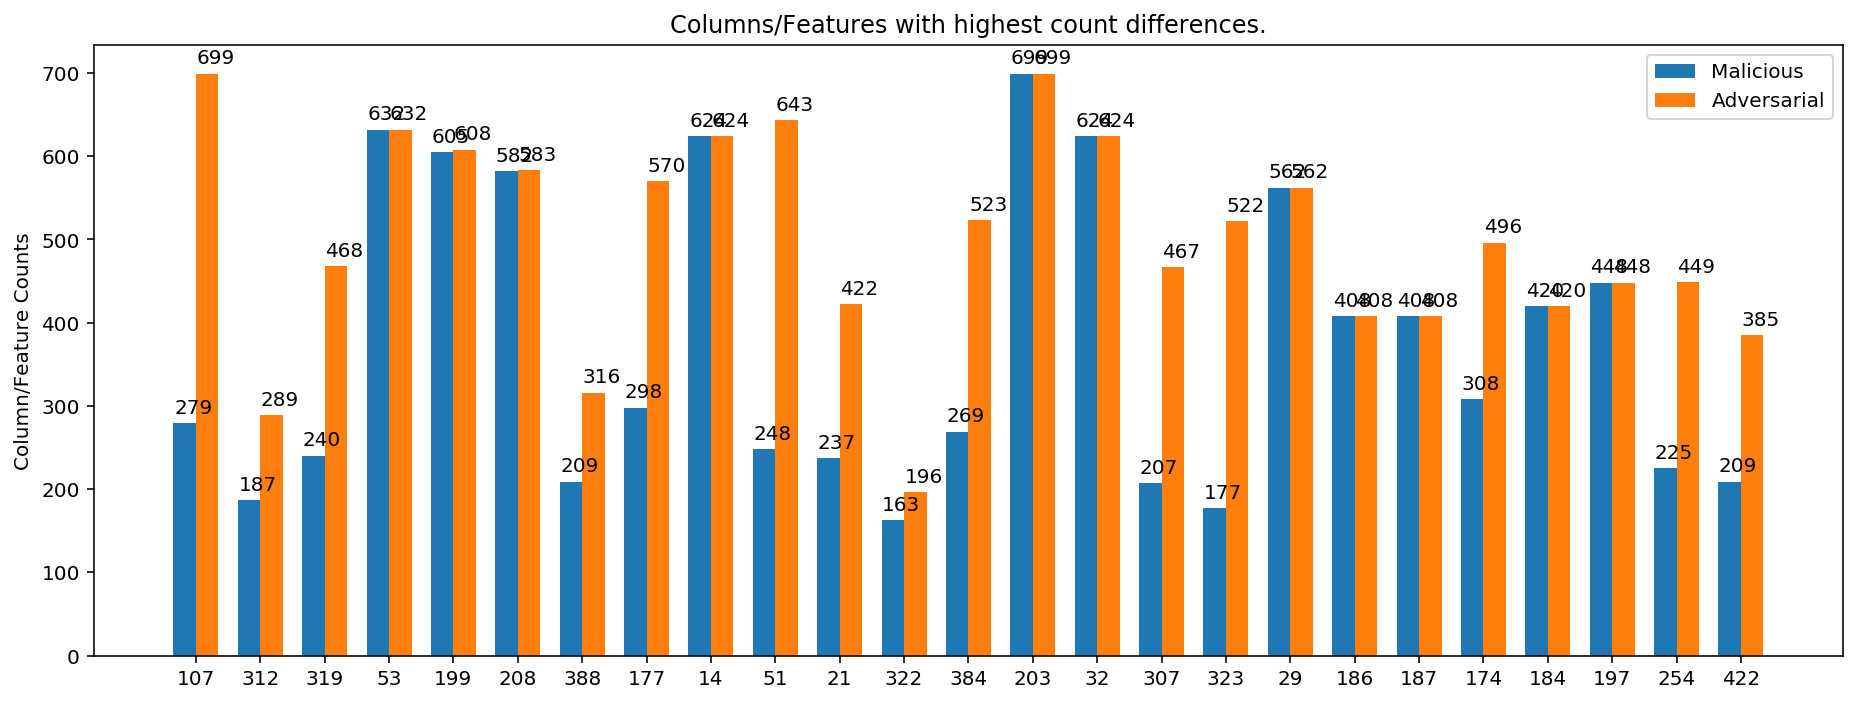

In [27]:
# We highlight the difference between adversarial and malicious samples by using the PEs with maximum difference 
# diffM_A=abs(MC - AC)

# Sort the indices based on most difference (Top 25).
# indicesM_A=diffM_A.argsort()[::-1][:25]
MCn = MC[indicesM_B]
ACn = AC[indicesM_B]

#Plotting the counts.
bar_plot(indicesM_B,MCn,ACn,["Malicious","Adversarial"])

### Benign vs Adversarial
Keeping this in mind and superimposing the adversarial counts against Benign samples, another interesting pattern can be observed. The adversarial samples that get generated, start showing increased counts for those features which had high(-ish) counts in the benign samples, as if trying to mimic their structure. This is further highlighted when we look at the malicious vs adversarial plot again to see that counts at feature 107 or 174 we observed to be more than twice as much in adversarial samples than in malicious. Eventhough this is an admittedly naive way to try and fool the defending system, it can be intuitively observed that engineering a successful adversarial sample (ideally) requires enhancing a malicious sample by trying to increasingly mimic the structure of a benign sample while maintaining its inherent malicious nature.

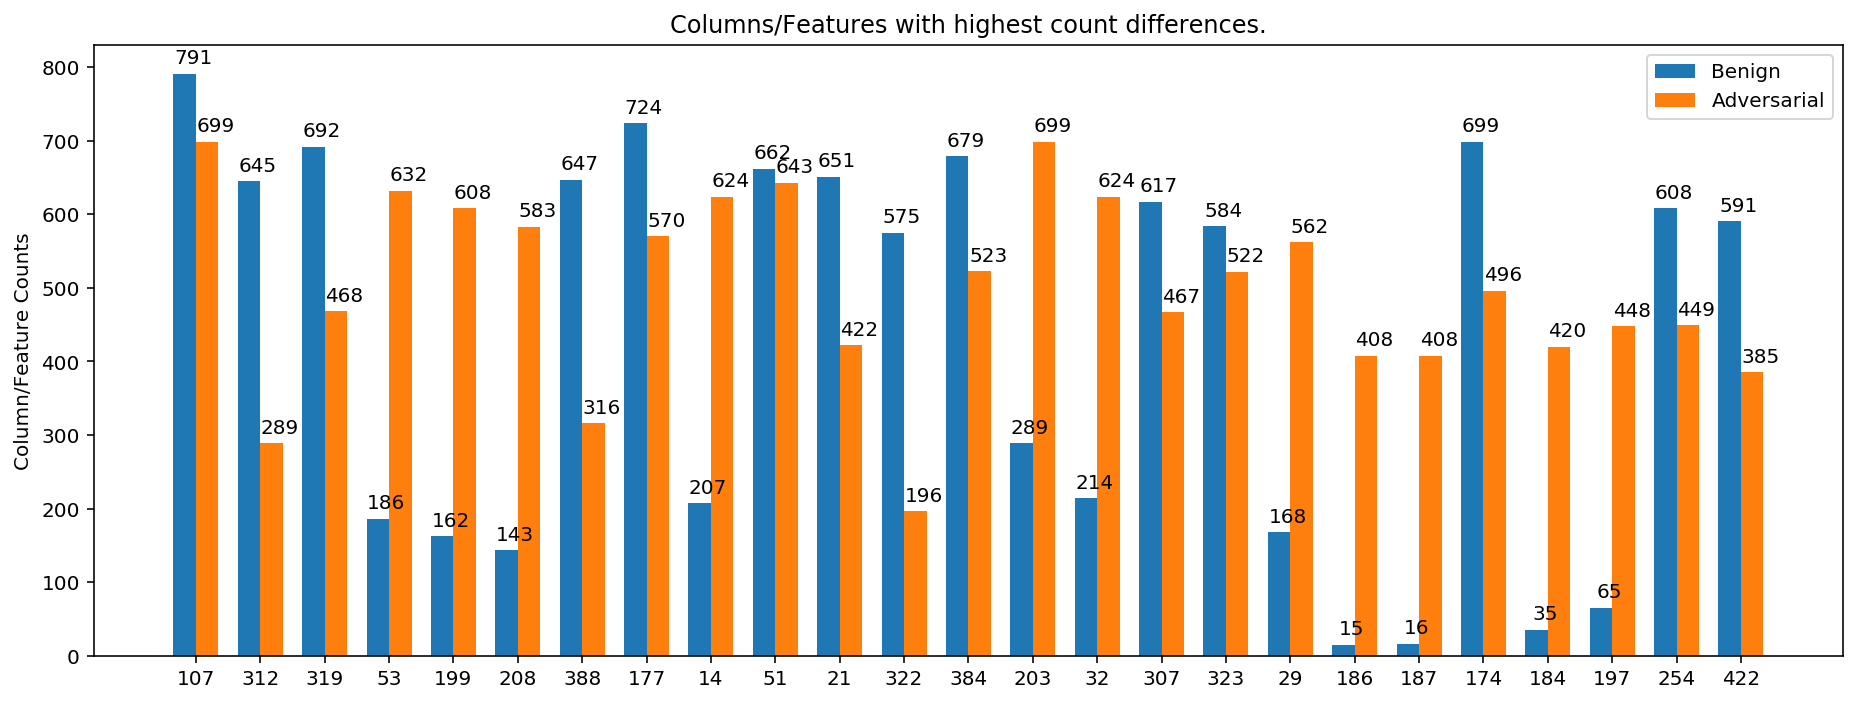

In [29]:
# We highlight the difference between benign and adversarial samples by using the PEs with maximum difference 
# diffB_A=abs(BC - AC)

# Sort the indices based on most difference (Top 25).
# indicesB_A=diffB_A.argsort()[::-1][:25]
BCn = BC[indicesM_B]
ACn = AC[indicesM_B]

#Plotting the counts.
bar_plot(indicesM_B,BCn,ACn,["Benign","Adversarial"])

## After Training :

### Malicious vs Adversarial
After training the network for 50 epochs, the adversarial samples are almost identical to the malicious samples as exepcted (the trend that we saw earlier even without training) and is clear from the plot below. The counts of various features is quite similar.

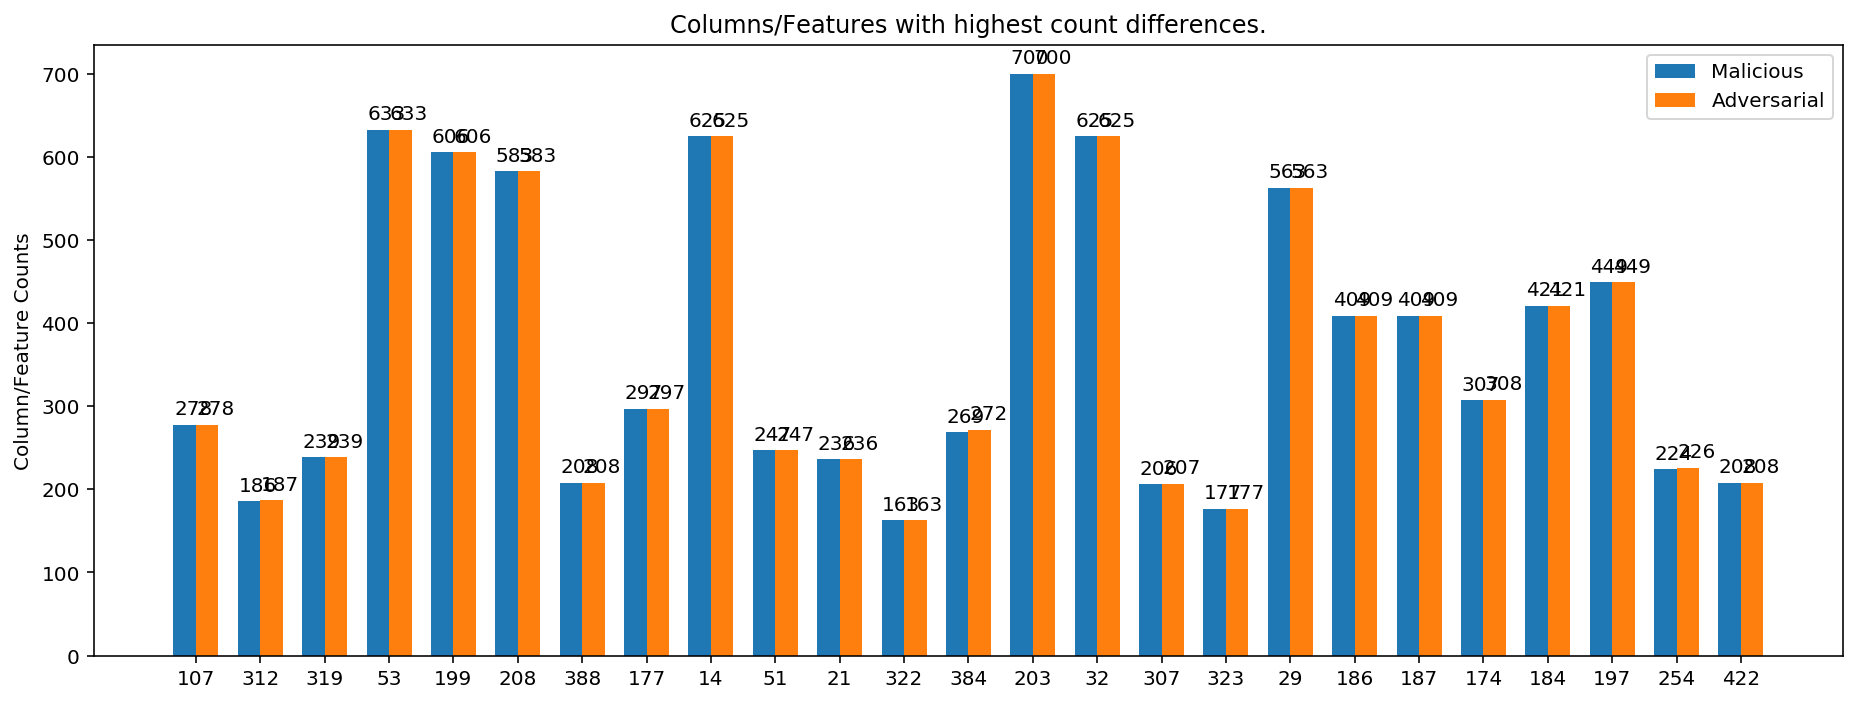

In [30]:
# We highlight the difference between malicious and adversarial samples by using the PEs with maximum difference 
# diffM_A_50=abs(MC_50 - AC_50)

# Sort the indices based on most difference (Top 25).
# indicesM_A_50=diffM_A_50.argsort()[::-1][:25]
MCn_50 = MC_50[indicesM_B]
ACn_50 = AC_50[indicesM_B]

#Plotting the counts.
bar_plot(indicesM_B,MCn_50,ACn_50,["Malicious","Adversarial"])

### Benign vs Adversarial
Comparing with the benign samples after training, it seems that the adversarial samples take a different (possibly smarter) approach than before, which was to blatantly try to mimic the structure of the benign samples. This is highlighted by ooking at the feature counts at 107 or 173 (just as before in the benign vs adversarrial plot w/o training) where the counts have reduced. This is an indication of the fact that the system generating these adversarial attacks has moved on from the blatant copying (of benign structures) to a more intricate way of trying to get past the defending system! This is further supported by the higher evasion rate observed by testing it against a defender that is not trained on adversarial samples.

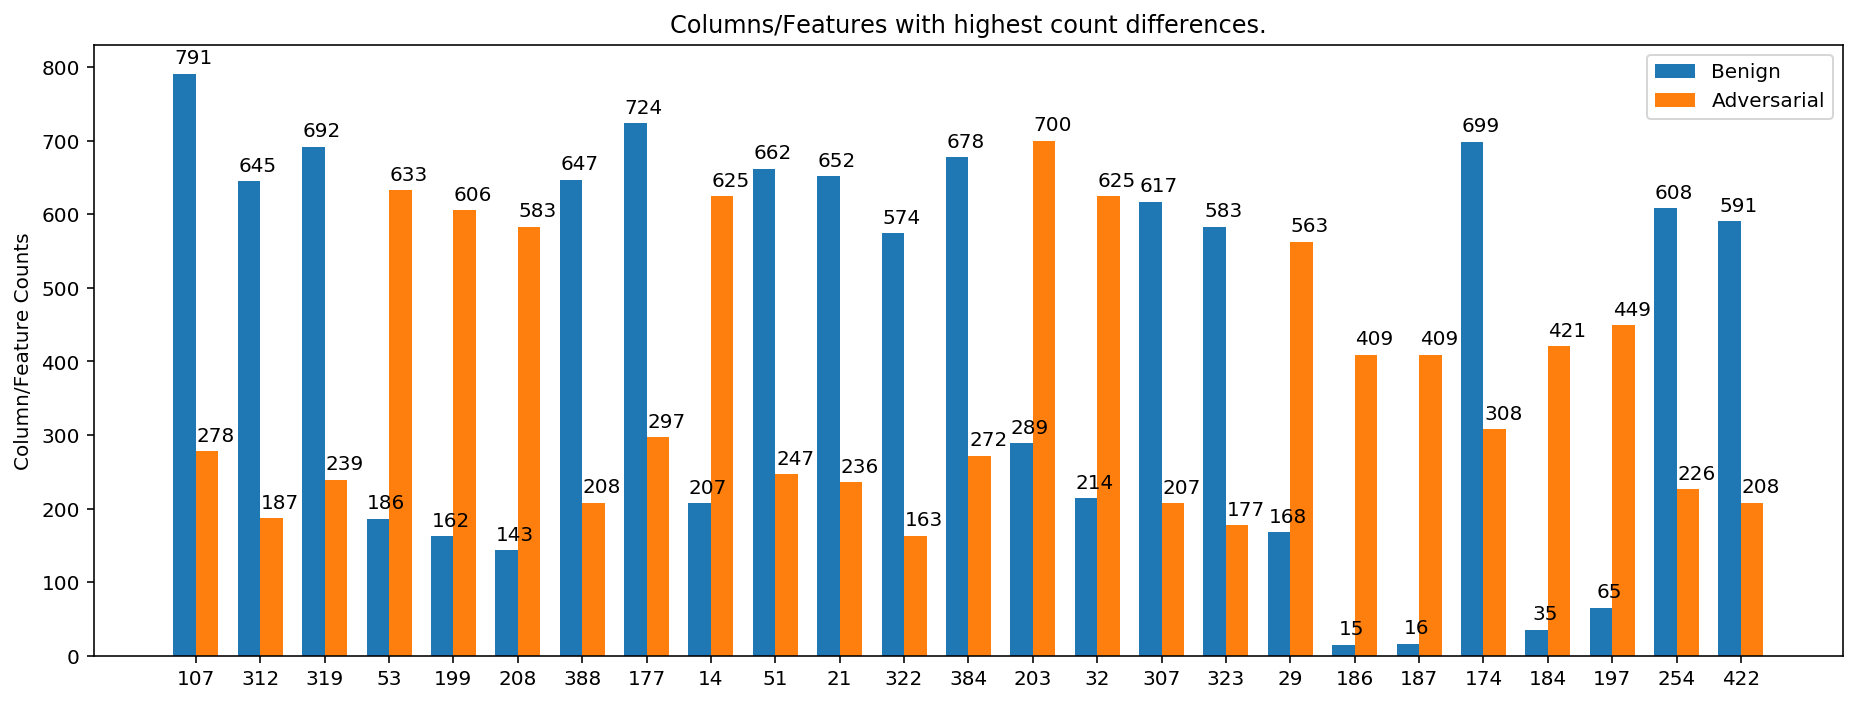

In [31]:
# We highlight the difference between benign and adversarial samples by using the PEs with maximum difference 
# diffB_A_50=abs(BC_50 - AC_50)

# Sort the indices based on most difference (Top 25).
# indicesB_A_50=diffB_A_50.argsort()[::-1][:25]
BCn_50 = BC_50[indicesM_B]
ACn_50 = AC_50[indicesM_B]

#Plotting the counts.
bar_plot(indicesM_B,BCn_50,ACn_50,["Benign","Adversarial"])

### Visualising Self-Organising-Maps for the different data types. 

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


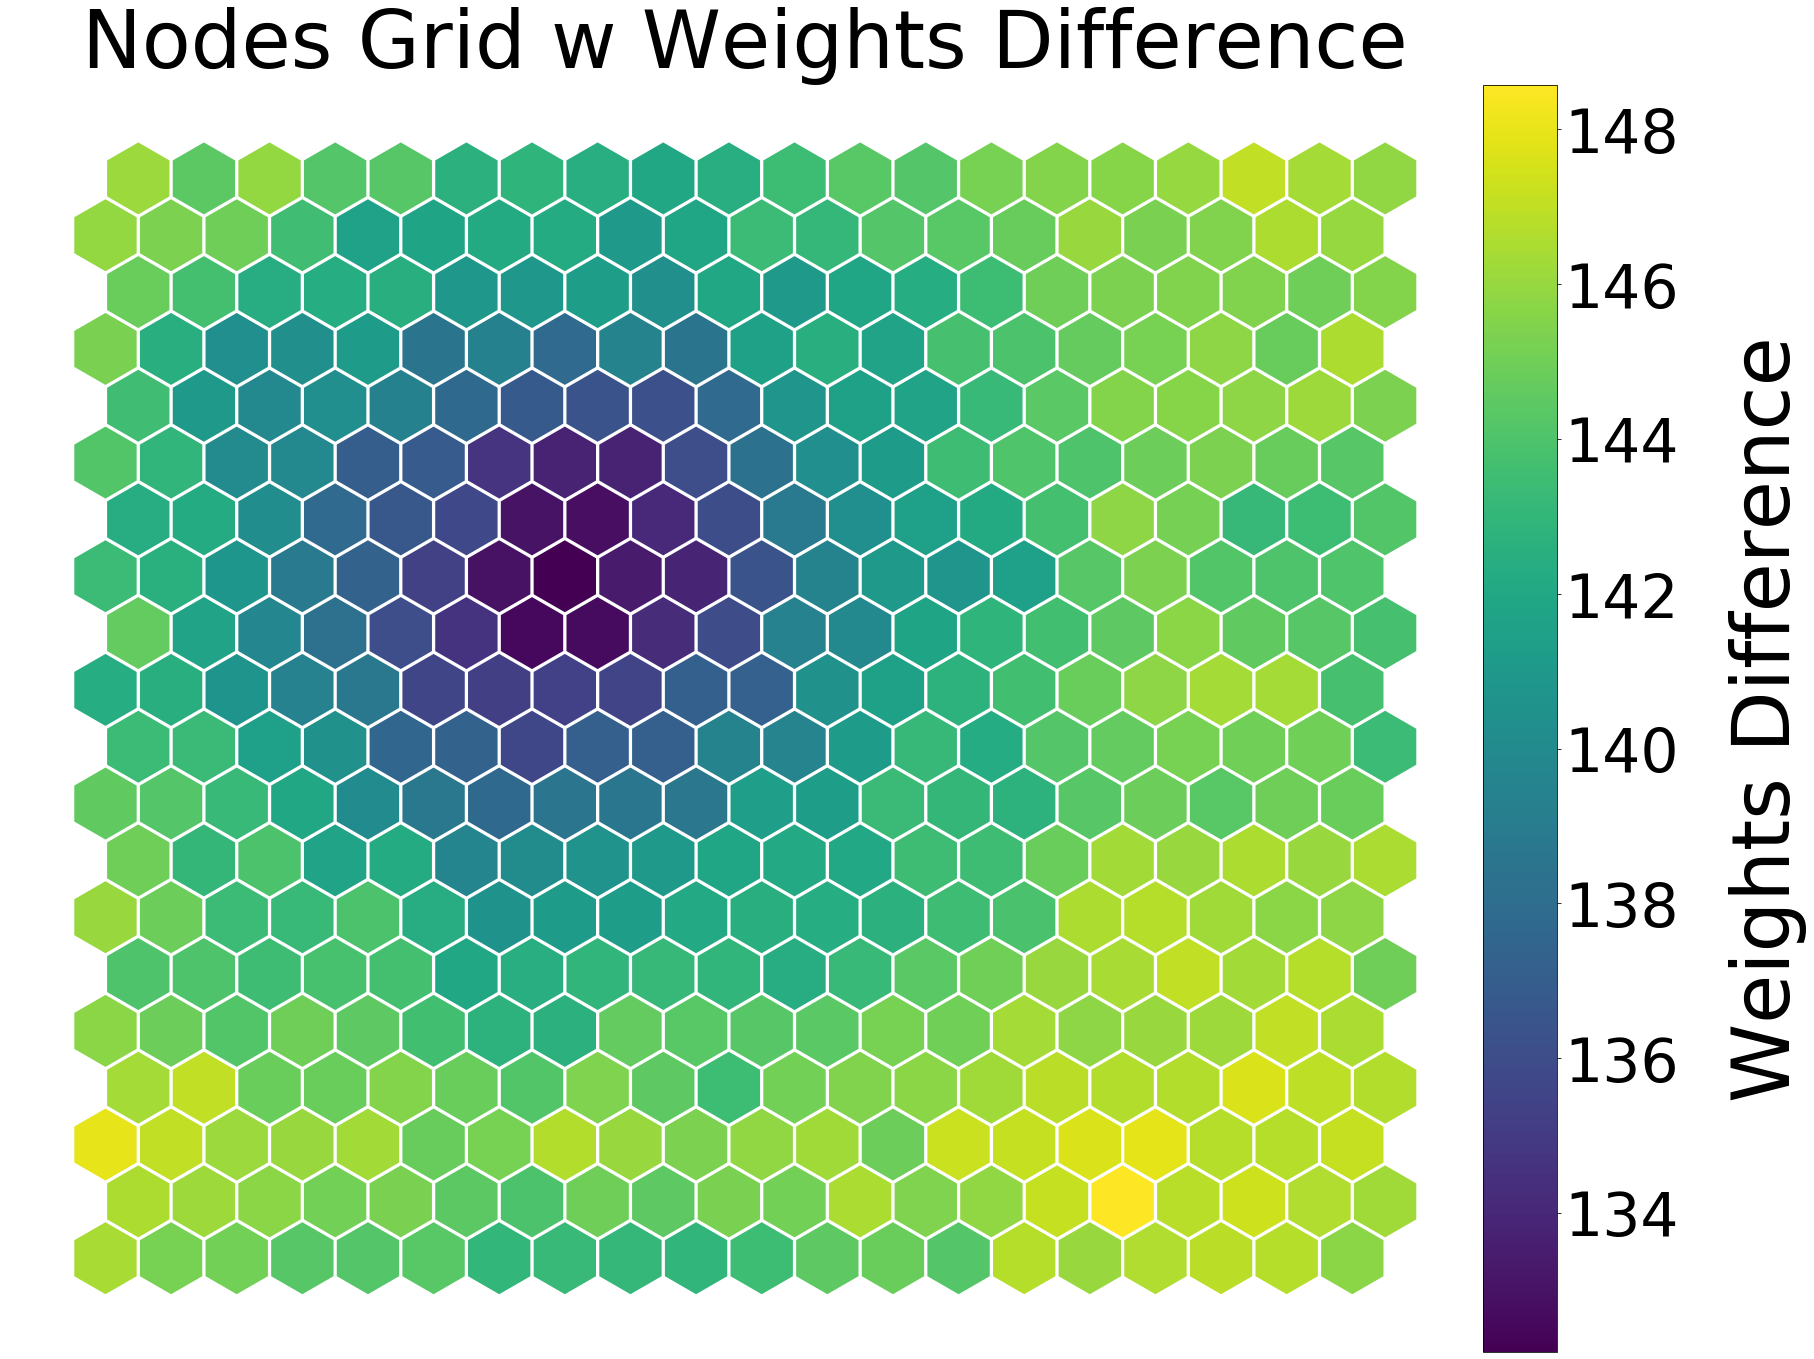

In [24]:
#SOMs for Malicious
Visualise_SOM(M)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


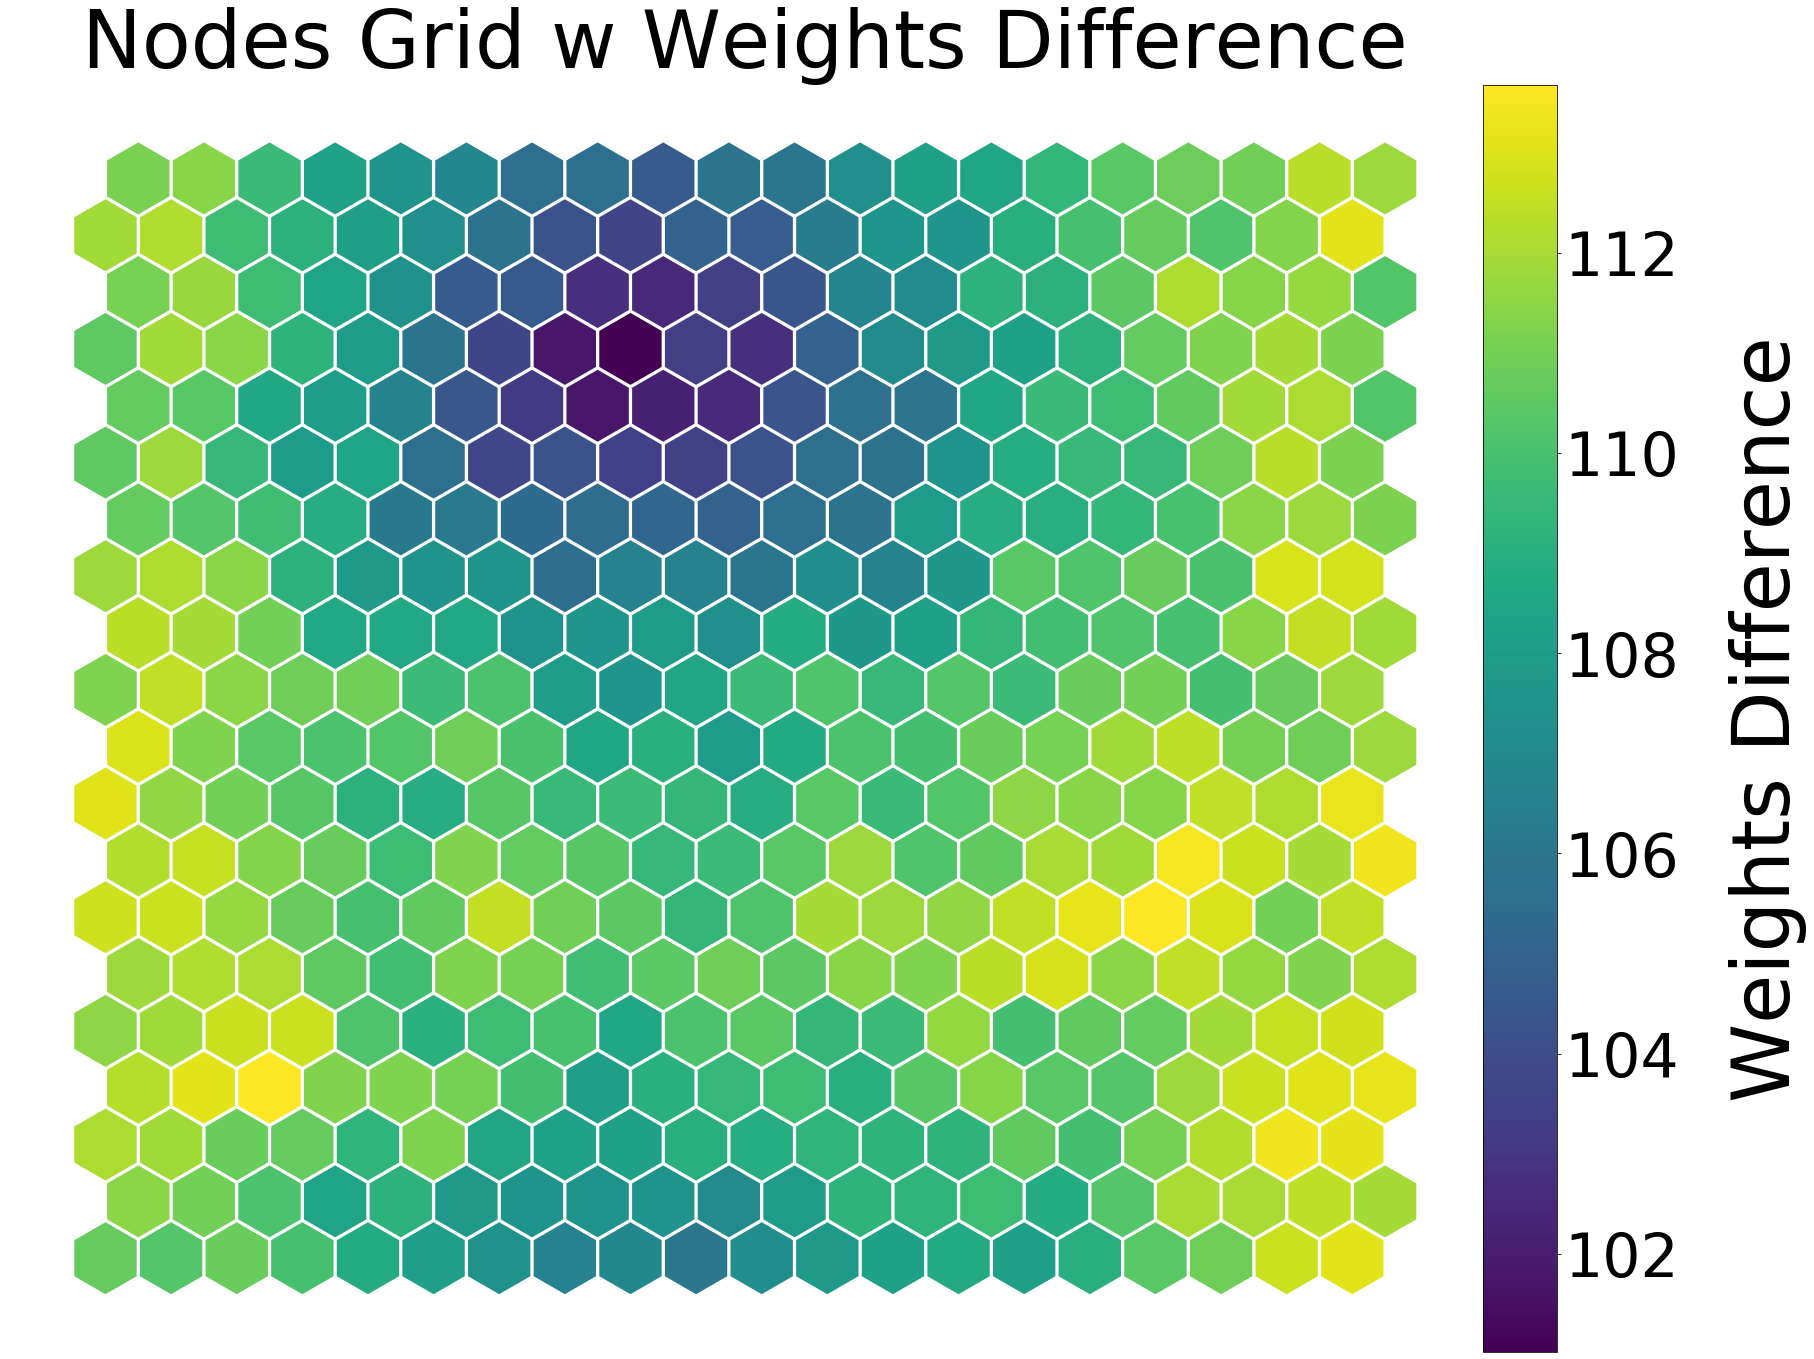

In [25]:
#SOMs for Benign
Visualise_SOM(B)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


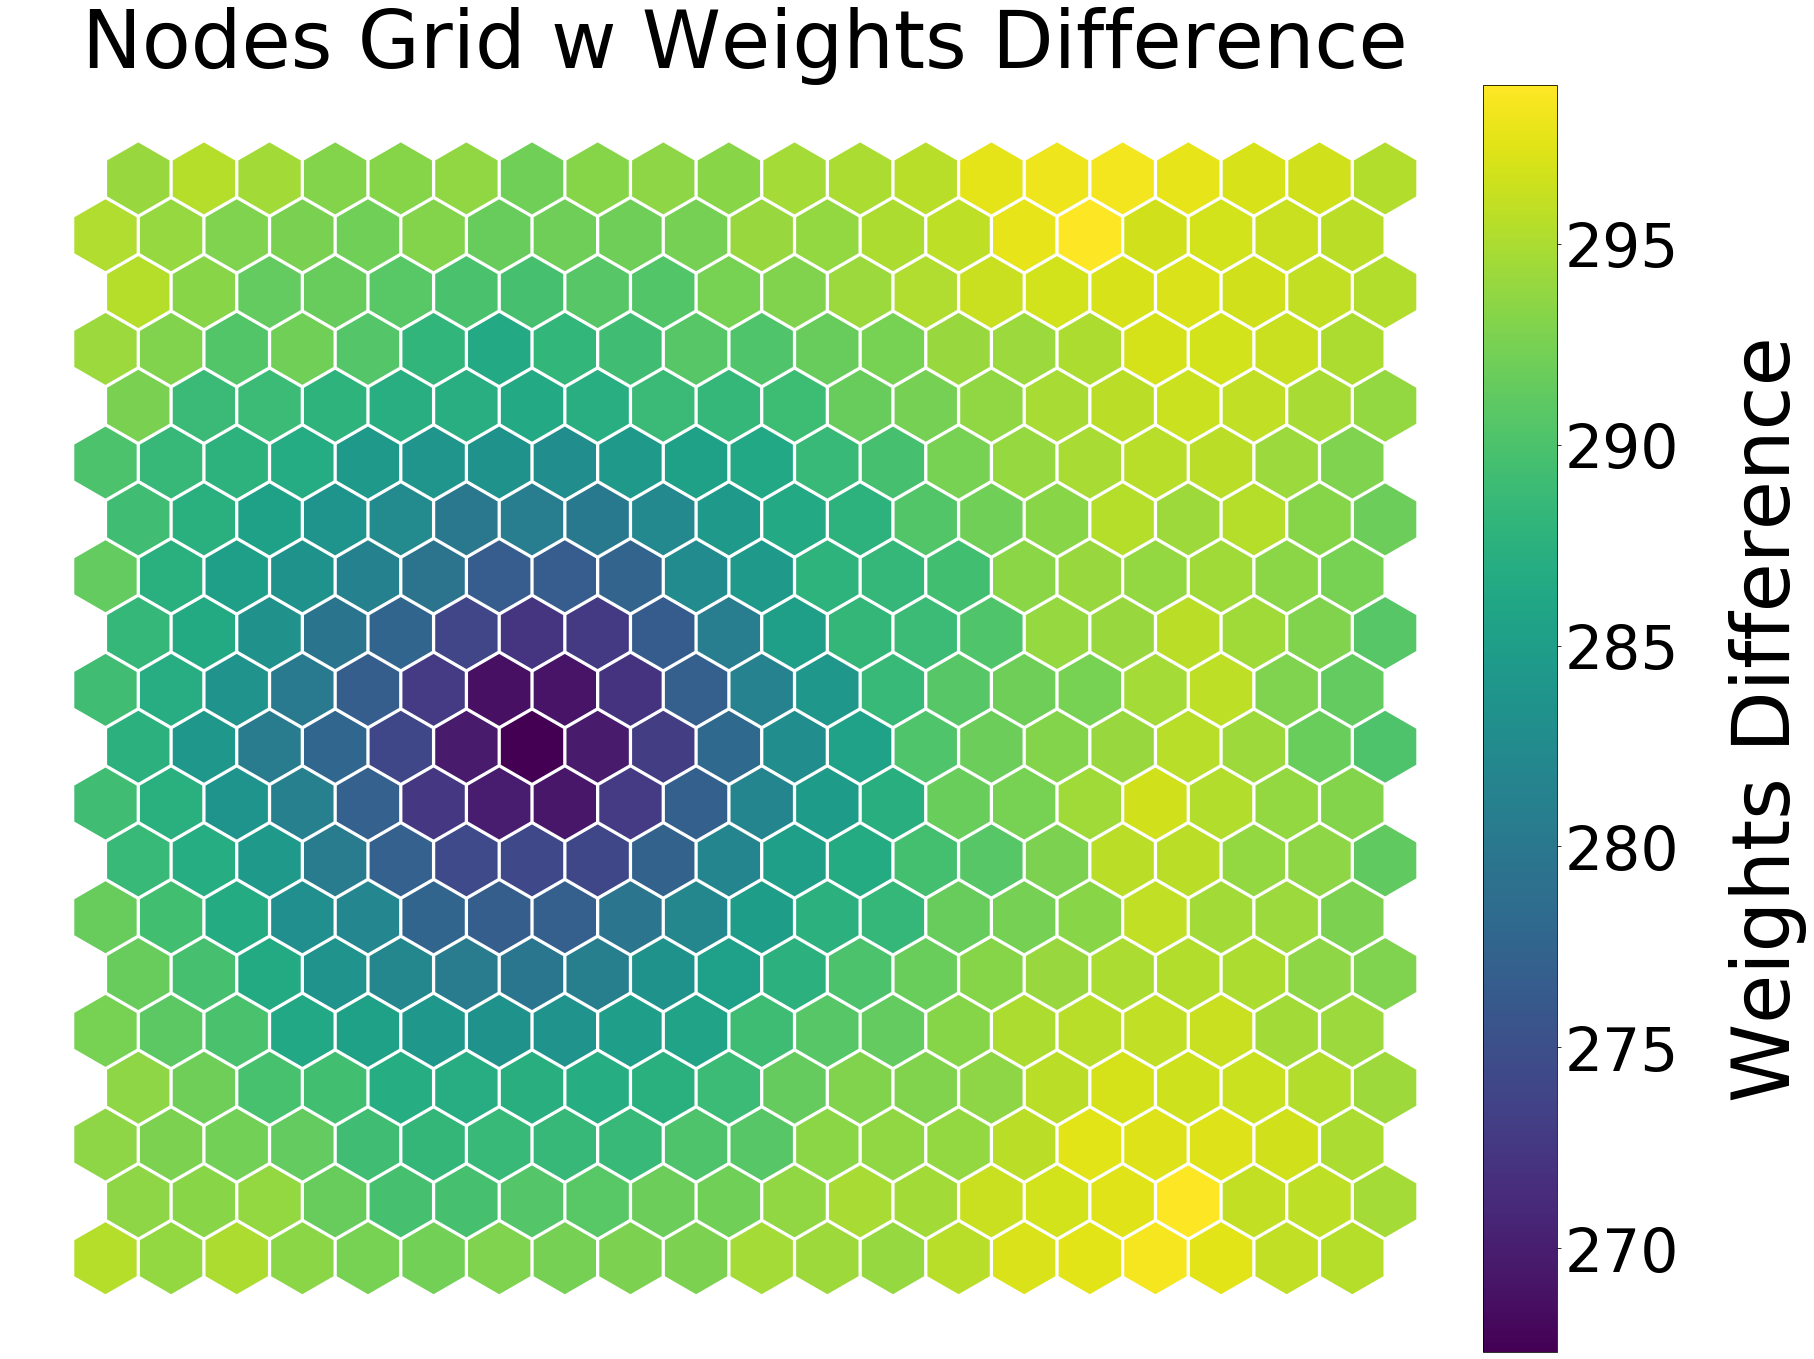

In [26]:
#SOMs for Adversarial(Before Training)
Visualise_SOM(A)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


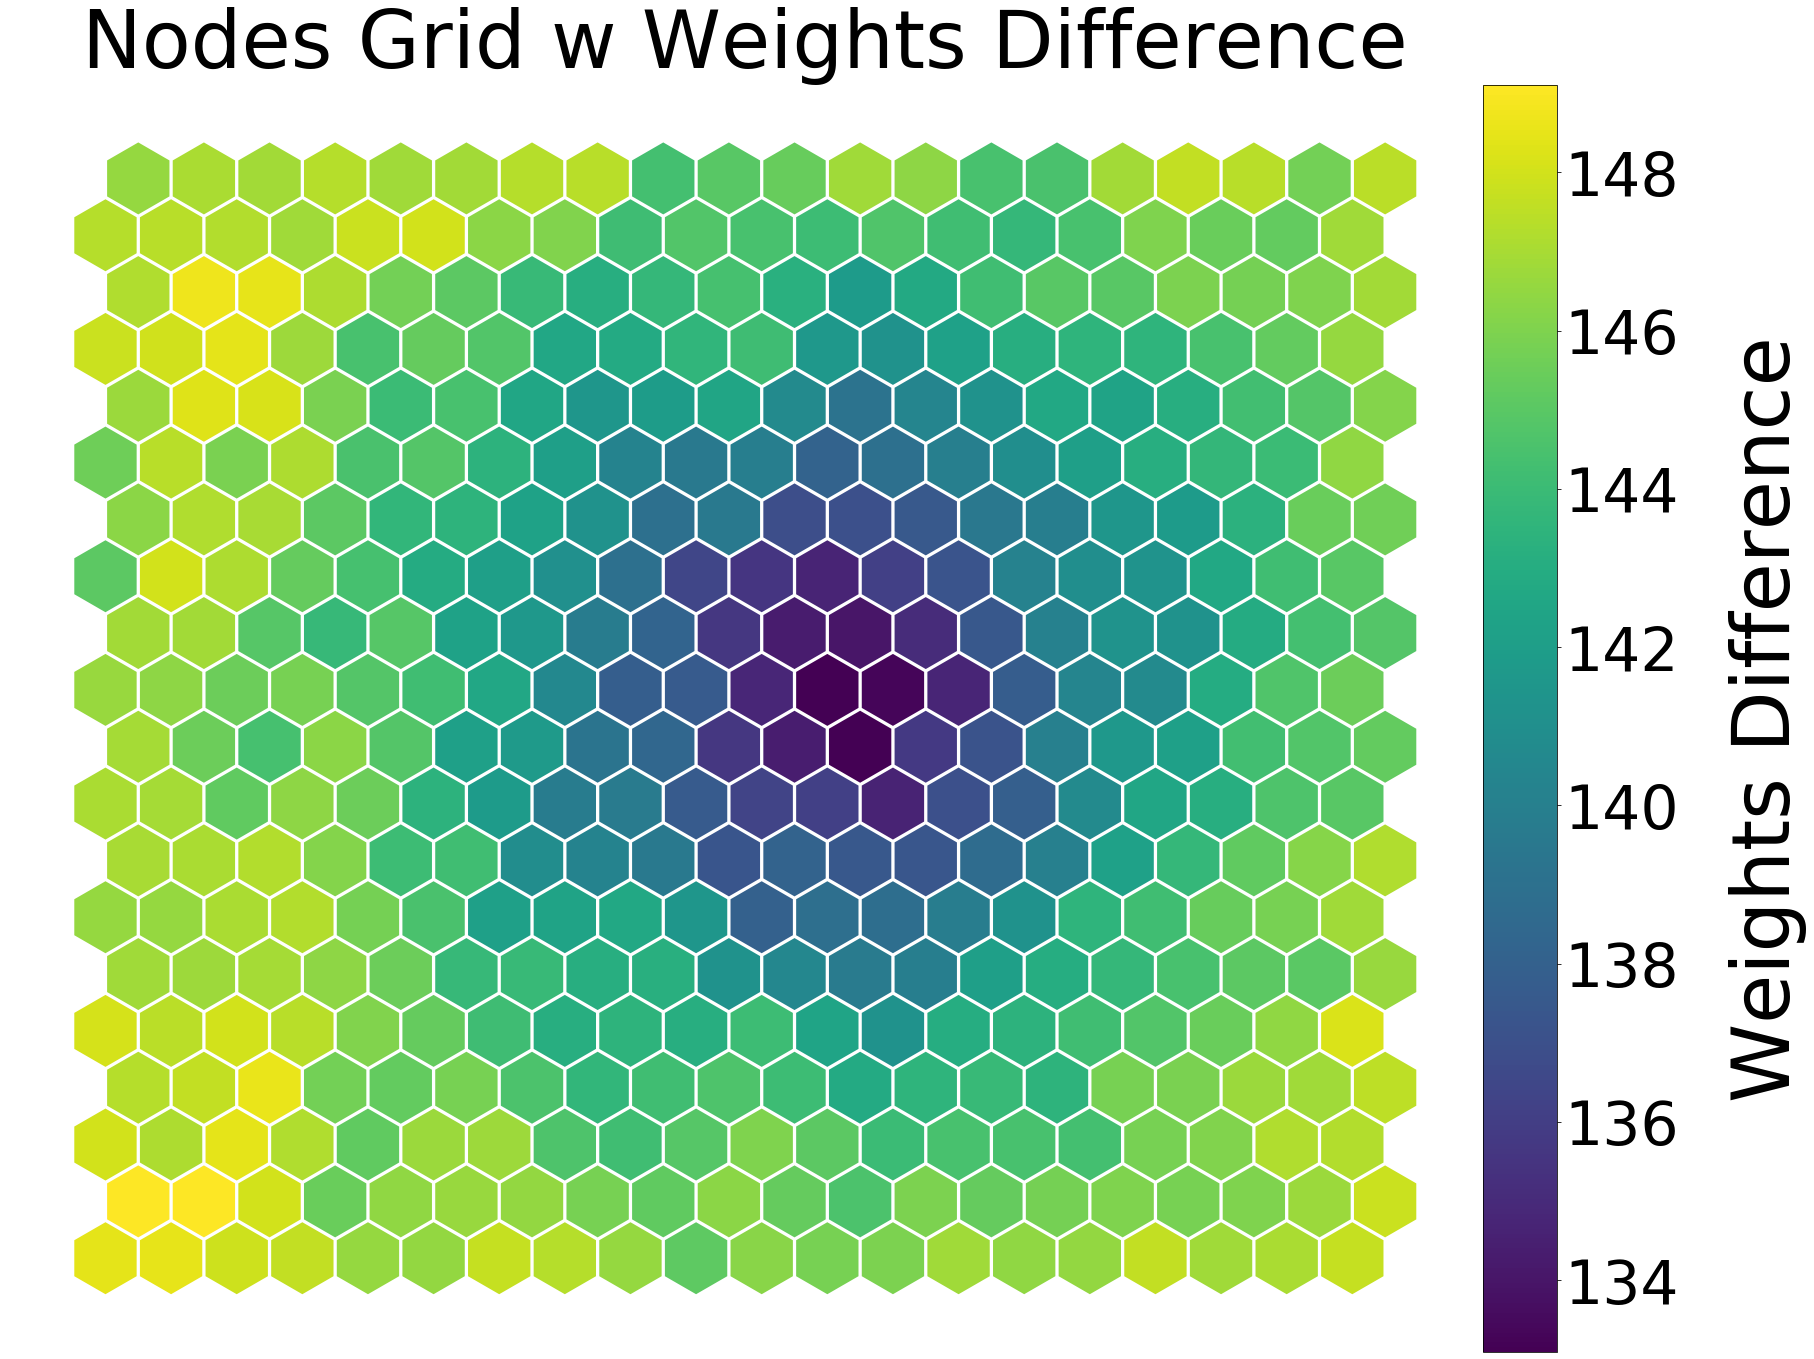

In [27]:
#SOMs for Adversarial(After Training)
Visualise_SOM(A_50)

## Visualising using Self-Organising Maps
To support our observations further, we dig deeper with the help of Self-Organising Maps or SOMs so as obtain a 2-d visualisation of the feature space. 

Firstly, we look at the SOMs for Malicious and Benign samples which suggests a difference in their feature space. This is quite understandable given that these samples have different structures representing their malicious or benign nature respectively. 

Secondly, we investigate the two SOMs generated from the Adversarial samples. The first adversarial SOM, generated using adversarial samples from an untrained network, closely resembles the structure of the malicious SOM as can be seen from the figure. This is in line with our inference from the frequency plots as well which was that the basic idea of generating an adversarial sample is to preserve malicious structure.

It is even more interesting to analyse the SOM for the second set of advesarial samples, i,e, the onea generated from a network trained for 50 epochs. It seems to have shifted into a different space as compared to the adversarial SOM suggesting that it is taking a different and possibly more robust approach towards engineering an adversarial sample so as to foll the defence. 